<a href="https://colab.research.google.com/github/parwisenlared/MasterThesis/blob/master/MnistTutorialCNNClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR Images CNN Classification

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/


In [6]:
pip install update keras


     |████████████████████████████████| 175.3 MB 19 kB/s  eta 0:00:01    |██████████████████▏             | 99.3 MB 1.8 MB/s eta 0:00:42     |██████████████████▍             | 100.5 MB 1.8 MB/s eta 0:00:42     |██████████████████▌             | 101.5 MB 2.0 MB/s eta 0:00:37     |███████████████████             | 104.4 MB 1.4 MB/s eta 0:00:49     |███████████████████▋            | 107.2 MB 2.2 MB/s eta 0:00:32     |████████████████████            | 109.9 MB 42 kB/s eta 0:25:53     |████████████████████▊           | 113.6 MB 1.5 MB/s eta 0:00:42     |████████████████████▉           | 114.2 MB 1.5 MB/s eta 0:00:41     |█████████████████████▌          | 117.9 MB 1.8 MB/s eta 0:00:32     |██████████████████████          | 120.6 MB 1.6 MB/s eta 0:00:34     |███████████████████████▊        | 130.0 MB 2.2 MB/s eta 0:00:21     |██████████████████████████████▏ | 165.3 MB 2.2 MB/s eta 0:00:05
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
     |████████████████████████████████| 1.3 MB 1.9 MB/s et

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


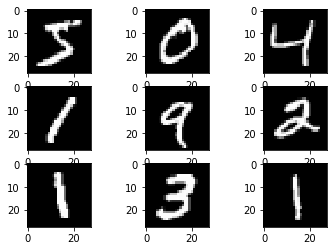

In [7]:
# example of loading the mnist dataset
from matplotlib import pyplot
from keras.datasets import mnist
from keras.utils import to_categorical

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

# plot first few images (train images)
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

In [10]:
trainX[0].shape

(28, 28)

 `trainX and testX are the images, trainy and testy are the labels`

In [ ]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [3]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10, mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
 
# load train and test dataset

def load_dataset():
	# load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  print("Data loaded")
  return trainX, trainY, testX, testY


# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  print("Pixel data ready")
  return train_norm, test_norm
 
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  print("Model defined")
  return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
	# save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=10, batch_size=20, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('Test Accuracy: %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)


In [4]:
# entry point, run the test harness
run_test_harness()

Data loaded
Pixel data ready
Model defined


KeyboardInterrupt: 